# Sheet 4
## Author
Maximilian Stablum 

Note: I created the following Sheet together with Tamino Gaub (tamino.gaub@student.uibk.ac.at). The Sheet looks in the most parts identical to him.

## Excersise 2a

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# read csv into dataframe
df_2020 = pd.read_csv('./Data/it_salary_2020.csv', delimiter=';')
df_2018 = pd.read_csv('./Data/it_salary_2018.csv', delimiter=';')
df_2018.sample(5)

,Timestamp,Age,Gender,City,Position,Total years of experience,Your level,Yearly brutto salary (without bonus and stocks) in EUR,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
105,14.12.2018 14:40,36.0,M,Berlin,SW Developer,10.0,Middle,73000.0,58000.0,55000.0,No,English,50-100,Startup
387,16.12.2018 11:51,30.0,M,München,Team Lead,9.0,Senior,70000.0,65000.0,75000.0,Yes,English,100-1000,Startup
478,18.12.2018 10:06,38.0,M,Berlin,Senior Java Developer,15.0,Senior,60000.0,60000.0,NaN,No,English,1000+,Startup
435,17.12.2018 14:57,28.0,F,Vienna,C++ sr. s/w dev,6.0,Senior,75000.0,75000.0,NaN,No,English,10-50,Product
572,19.12.2018 17:01,34.0,M,München,QA,10.0,Middle,70000.0,NaN,NaN,No,Deutsch,100-1000,Product


## 2a

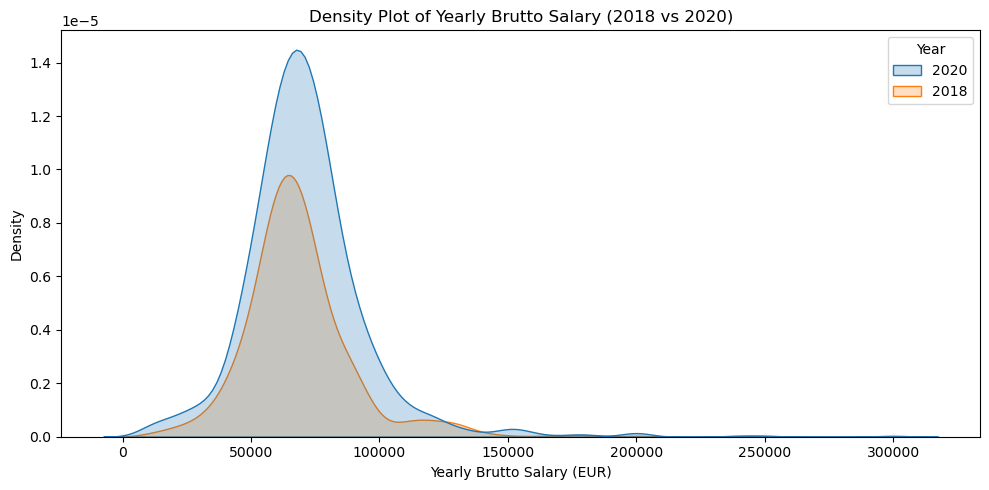

In [3]:
# Define the threshold for salary (like in exercise 1)
threshold = 300000

# Filter the dataframes to exclude salaries above the threshold
df_2020_salary_filtered = df_2020[df_2020['Yearly brutto salary (without bonus and stocks) in EUR'] <= threshold].copy()
df_2018_salary_filtered = df_2018[df_2018['Yearly brutto salary (without bonus and stocks) in EUR'] <= threshold].copy()

# Add a Year column to each filtered DataFrame
df_2020_salary_filtered['Year'] = '2020'
df_2018_salary_filtered['Year'] = '2018'

# Combine the dataframes for plotting
df_combined = pd.concat([df_2020_salary_filtered, df_2018_salary_filtered])

# Visual Inspection
plt.figure(figsize=(10, 5))

# Density Plot for Yearly Brutto Salary
sns.kdeplot(data=df_combined, x='Yearly brutto salary (without bonus and stocks) in EUR', hue='Year', fill=True)
plt.title('Density Plot of Yearly Brutto Salary (2018 vs 2020)')
plt.xlabel('Yearly Brutto Salary (EUR)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

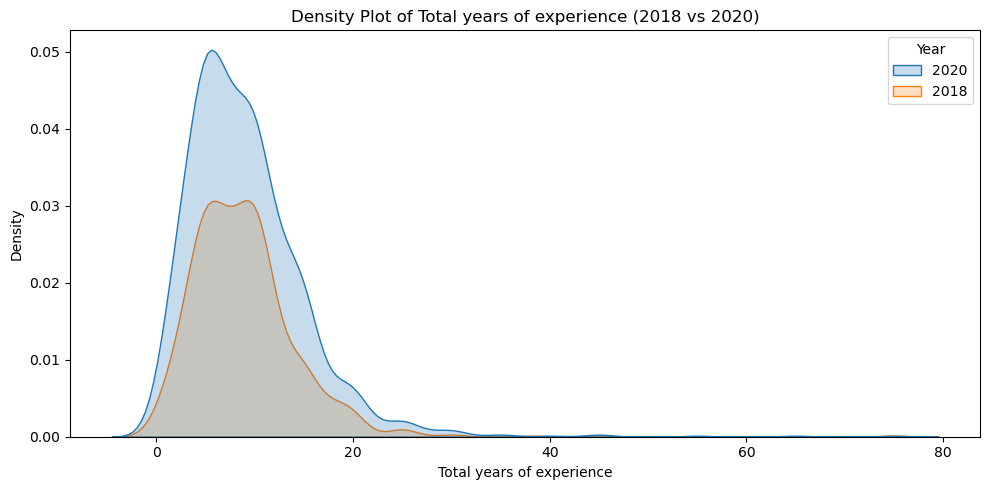

In [4]:
# Set the treshold for age to 75 Years
experience_threshold=75

# Filter the dataframes
df_2020_exp_filtered = df_2020[df_2020['Total years of experience'] <= experience_threshold].copy()
df_2018_exp_filtered = df_2018[df_2018['Total years of experience'] <= experience_threshold].copy()

#Add a Year column to each filtered DataFrame
df_2020_exp_filtered['Year'] = '2020'
df_2018_exp_filtered['Year'] = '2018'

# Combine the dataframes for plotting
df_combined_exp = pd.concat([df_2020_exp_filtered, df_2018_exp_filtered])

# Visual Inspection
plt.figure(figsize=(10, 5))

# Density Plot for Yearly Brutto Salary
sns.kdeplot(data=df_combined_exp, x='Total years of experience', hue='Year', fill=True)
plt.title('Density Plot of Total years of experience (2018 vs 2020)')
plt.xlabel('Total years of experience')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [5]:
# Calculate skewness and kurtosis for 2018 and 2020
skewness_2020_salary = df_2020_salary_filtered['Yearly brutto salary (without bonus and stocks) in EUR'].skew().round(2)
kurtosis_2020_salary = df_2020_salary_filtered['Yearly brutto salary (without bonus and stocks) in EUR'].kurtosis().round(2)
skewness_2018_salary = df_2018_salary_filtered['Yearly brutto salary (without bonus and stocks) in EUR'].skew().round(2)
kurtosis_2018_salary = df_2018_salary_filtered['Yearly brutto salary (without bonus and stocks) in EUR'].kurtosis().round(2)

# Create a DataFrame to display the results
results = {
    'Metric': ['Skewness', 'Kurtosis'],
    '2018': [skewness_2018_salary, kurtosis_2018_salary],
    '2020': [skewness_2020_salary, kurtosis_2020_salary]
}

# Create a pandas dataframe
results_df = pd.DataFrame(results)

# Display the DataFrame
print('Shape metrics for the Yearly Brutto Salary (2018 vs. 2020):')
results_df

Shape metrics for the Yearly Brutto Salary (2018 vs. 2020):


,Metric,2018,2020
0,Skewness,1.41,2.20
1,Kurtosis,5.18,13.57


- The big increase in skewness and kurtosis for “Yearly brutto salary (without bonus and stocks) in EUR” from 2018 to 2020 means salaries were more uneven and there were more extreme high salaries in 2020.
- The rise in skewness and kurtosis for “Total years of experience” from 2018 to 2020 shows that more people had very little experience and there were more extreme cases in 2020.

## 2b
Did the spread of the column Yearly brutto salary (without bonus and stocks) in EUR and total years of experience change – if so, how can the differences in the spread be interpreted?

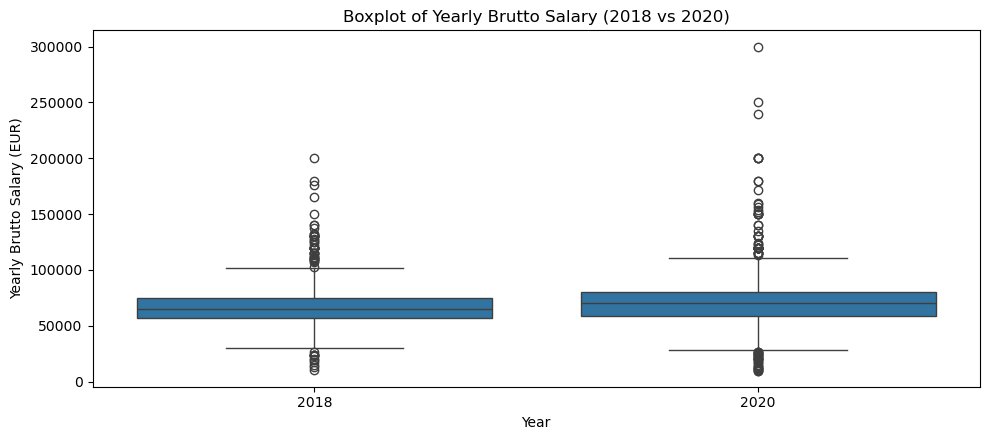

In [6]:
# Combine the dataframes for plotting
df_combined = pd.concat([df_2018_salary_filtered, df_2020_salary_filtered])

# Create the boxplot for Yearly Brutto Salary
plt.figure(figsize=(10, 4.5))
sns.boxplot(
    data=df_combined, 
    x='Year', 
    y='Yearly brutto salary (without bonus and stocks) in EUR'
)
plt.title('Boxplot of Yearly Brutto Salary (2018 vs 2020)')
plt.xlabel('Year')
plt.ylabel('Yearly Brutto Salary (EUR)')
plt.tight_layout()
plt.show()

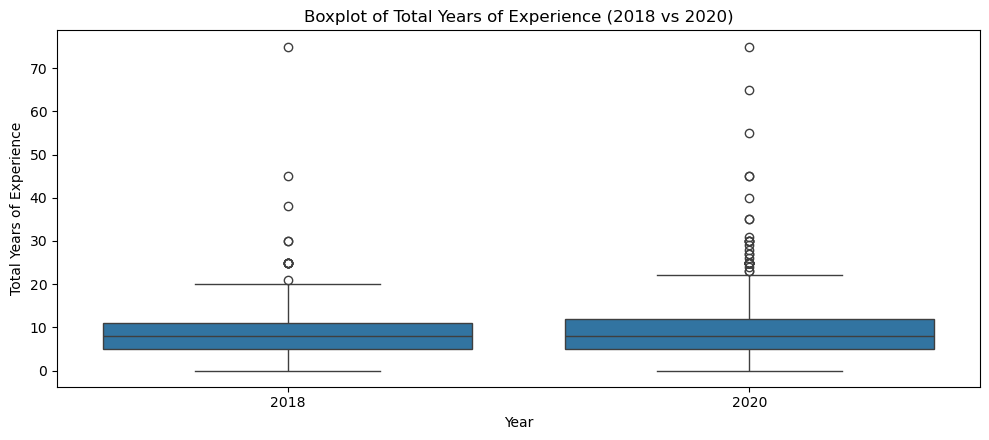

In [7]:
# Combine the dataframes for plotting
df_combined_exp = pd.concat([df_2018_exp_filtered, df_2020_exp_filtered])

# Create the boxplot for Yearly Brutto Salary
plt.figure(figsize=(10, 4.5))
sns.boxplot(
    data=df_combined_exp, 
    x='Year', 
    y='Total years of experience'
)
plt.title('Boxplot of Total Years of Experience (2018 vs 2020)')
plt.xlabel('Year')
plt.ylabel('Total Years of Experience')
plt.tight_layout()
plt.show()

 Interpretation:
 - Yearly Brutto Salary: The density plot shows a wider spread in 2020, indicating increased salary variability and higher salaries compared to 2018. The box plot supports this, showing more extreme values in 2020.
 - Total Years of Experience: The density plot shows a higher concentration of less experienced employees in 2020, with the distribution narrowing compared to 2018. The box plot indicates a similar interquartile range (IQR) for both years but with more outliers in 2020, suggesting increased variability in experience levels.

## 2c

How did the relationship (correlations, covariances etc.) between the values in the datasets change? You can use the already caclulated covariance and correlation of exercise 1 and only calculate the values for the modified dataset.

In [8]:
# Define the thresholds for total years of experience and salary
threshold = 300000

# Filter the dataframes to exclude total years of experience above the threshold and salary above the threshold
df_2020_filtered = df_2020[(df_2020['Total years of experience'] <= experience_threshold) & 
                           (df_2020['Yearly brutto salary (without bonus and stocks) in EUR'] <= threshold)].copy()
df_2018_filtered = df_2018[(df_2018['Total years of experience'] <= experience_threshold) & 
                           (df_2018['Yearly brutto salary (without bonus and stocks) in EUR'] <= threshold)].copy()

# Correlation for 2018
correlation_2018 = df_2018_filtered['Total years of experience'].corr(df_2018_filtered['Yearly brutto salary (without bonus and stocks) in EUR'])
# Covariance for 2018
covariance_2018 = df_2018_filtered['Total years of experience'].cov(df_2018_filtered['Yearly brutto salary (without bonus and stocks) in EUR'])

# Correlation for 2020
correlation_2020 = df_2020_filtered['Total years of experience'].corr(df_2020_filtered['Yearly brutto salary (without bonus and stocks) in EUR'])
# Covariance for 2020
covariance_2020 = df_2020_filtered['Total years of experience'].cov(df_2020_filtered['Yearly brutto salary (without bonus and stocks) in EUR'])

# Print results
print("Correlation and Covariance for the modified dataset:")
print(f"Correlation 2018: {correlation_2018}")
print(f"Covariance 2018: {covariance_2018}")
print(f"Correlation 2020: {correlation_2020}")
print(f"Covariance 2020: {covariance_2020}")

Correlation and Covariance for the modified dataset:
Correlation 2018: 0.29557027001489106
Covariance 2018: 35074.75550287652
Correlation 2020: 0.2735069073394403
Covariance 2020: 41637.140910671675


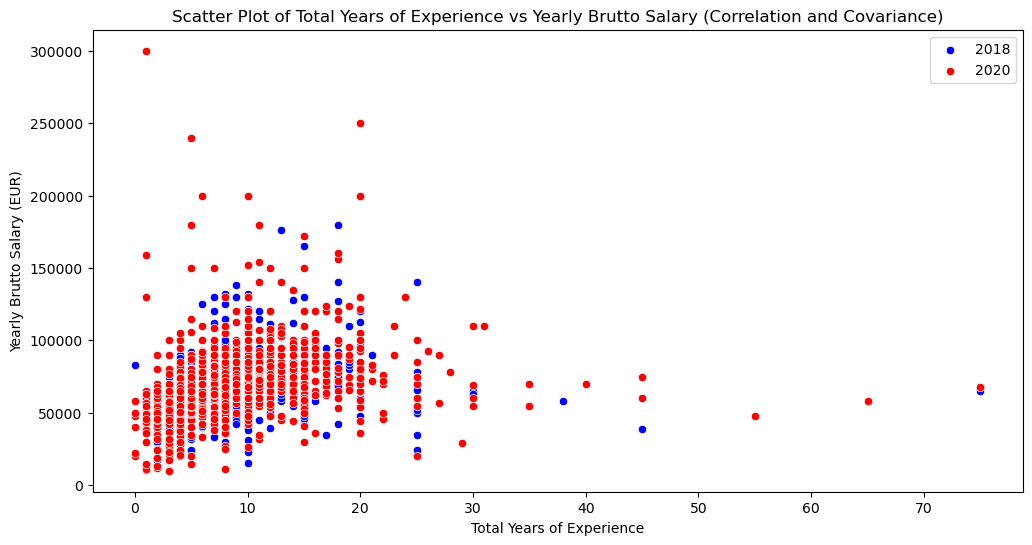

In [9]:
# Scatter plot for correlation
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=df_2018_filtered['Total years of experience'], 
    y=df_2018_filtered['Yearly brutto salary (without bonus and stocks) in EUR'], 
    color='blue', 
    label='2018'
)
sns.scatterplot(
    x=df_2020_filtered['Total years of experience'], 
    y=df_2020_filtered['Yearly brutto salary (without bonus and stocks) in EUR'], 
    color='red', 
    label='2020'
)
plt.title('Scatter Plot of Total Years of Experience vs Yearly Brutto Salary (Correlation and Covariance)')
plt.xlabel('Total Years of Experience')
plt.ylabel('Yearly Brutto Salary (EUR)')
plt.legend()
plt.show()

- In 2018, there was a positive correlation between total years of experience and yearly brutto salary, meaning more experience generally led to higher salaries. In 2020, this relationship became slightly negative, indicating that more experience did not necessarily lead to higher salaries.

- In 2018, the positive covariance indicated that as experience increased, salaries tended to increase as well. In 2020, the negative covariance suggests that higher experience levels were associated with lower salaries, which could be due to the economic impact of COVID-19, leading to salary cuts or job losses for more experienced (and higher-paid) employees.